In [1]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.datasets import load_iris, load_digits, load_boston

In [2]:
rng = np.random.RandomState(31337)

In [3]:
import pandas as pd

dengue2013 = pd.read_csv("../Dengue/dengueCases2013.csv")
dengue2013 = dengue2013.sort_values('moh_id')
dengue2014 = pd.read_csv("../Dengue/dengueCases2014.csv")
dengue2014 = dengue2014.sort_values('moh_id')

In [4]:
deng2013npX = np.stack([dengue2013['1'],dengue2013['2'],dengue2013['3']]).T
deng2013npY = np.stack([dengue2013['4']]).T
for i in range(2,50):
    temp1 = np.stack([dengue2013[str(i+3)]])
    temp2 = np.stack([dengue2013[str(i)],dengue2013[str(i+1)],dengue2013[str(i+2)]])
    deng2013npY = np.concatenate((deng2013npY,temp1.T))
    deng2013npX = np.concatenate((deng2013npX,temp2.T))


In [5]:
# X_train, X_test, y_train, y_test = train_test_split(deng2013npX, deng2013npY, test_size=0.33, random_state=rng)

In [13]:
import pickle
import xgboost as xgb
from math import sqrt

In [10]:
xgb_model = xgb.XGBRegressor().fit(deng2013npX, deng2013npY)
# predictions = xgb_model.predict(X_test)
# actuals = y_test
# print(mean_squared_error(actuals, np.rint(predictions)))
# print(r2_score(actuals,np.rint(predictions)))

In [11]:
deng2014npX = np.stack([dengue2014['1'],dengue2014['2'],dengue2014['3']]).T
deng2014npY = np.stack([dengue2014['4']]).T
for i in range(2,50):
    temp3 = np.stack([dengue2014[str(i+3)]])
    temp4 = np.stack([dengue2014[str(i)],dengue2014[str(i+1)],dengue2014[str(i+2)]])
    deng2014npY = np.concatenate((deng2014npY,temp3.T))
    deng2014npX = np.concatenate((deng2014npX,temp4.T))

In [14]:
predictions14 = xgb_model.predict(deng2014npX)
actuals14 = deng2014npY
print(sqrt(mean_squared_error(actuals14, predictions14)))
print(r2_score(actuals14,predictions14))

3.925035529653189
0.7107559280030642


In [15]:
def pdtonumpy(pdset):
    X = np.stack([pdset['1'],pdset['2'],pdset['3']]).T
    y = np.stack([pdset['4']]).T
    for i in range(2,50):
        tempY = np.stack([pdset[str(i+3)]])
        tempX = np.stack([pdset[str(i)],pdset[str(i+1)],pdset[str(i+2)]])
        y = np.concatenate((y,tempY.T))
        X = np.concatenate((X,tempX.T))
    return X,y

In [16]:
def rowtonumpy(row):
    X = np.stack([[row['1'],row['2'],row['3']]])
    y = np.stack([row['4']])
    for i in range(2,50):
        tempRY = np.stack([row[str(i+3)]])
        tempRX = np.stack([[row[str(i)],row[str(i+1)],row[str(i+2)]]])
        y = np.concatenate((y,tempRY))
        X = np.concatenate((X,tempRX))
    return X,y

In [17]:
panadura13 = dengue2013.loc[dengue2013.moh=='Panadura']
panadura13X,panadura13y = pdtonumpy(panadura13)
predictions13panadura = xgb_model.predict(panadura13X)
actuals13panadura = panadura13y
print(mean_squared_error(actuals13panadura, predictions13panadura))
print(r2_score(actuals13panadura,predictions13panadura))

48.306993957575024
0.13848999114508165


In [19]:
def calcErrorForMOH(pdset,model):
    # Creating an empty Dataframe with column names only
    results = pd.DataFrame(columns=['MOH', 'MSE', 'R2'])
    for index, row in pdset.iterrows():
        X,y = rowtonumpy(row)
        predictionsMOH = xgb_model.predict(X)
        actualsMOH = y
        mse = mean_squared_error(actualsMOH, predictionsMOH)
        r2 = r2_score(actualsMOH,predictionsMOH)
        results = results.append({"MOH":row['moh'],'MSE': mse, 'R2': r2}, ignore_index=True)
    return results

In [20]:
results = calcErrorForMOH(dengue2014,xgb_model)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [22]:
plt.rcParams['figure.figsize'] = [10, 5]

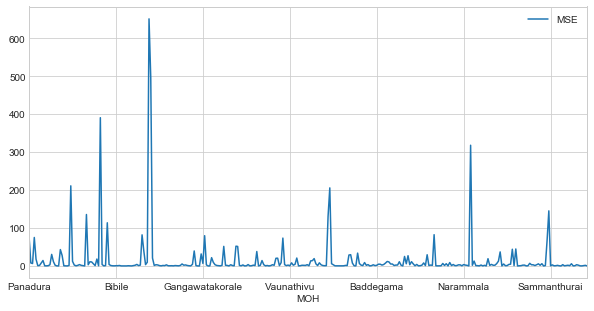

In [23]:
results.plot(x='MOH',y='MSE', kind='line')